# Identyfikacja klas zdjęć z fast.ai v2 - krówki 🐄

### 1. Import bibliotek

In [ ]:
!pip install fastbook
import fastbook
from fastbook import *
from fastai.vision.widgets import *
from IPython.core.pylabtools import figsize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 719 kB 35.4 MB/s 
     |████████████████████████████████| 1.2 MB 58.6 MB/s 
     |████████████████████████████████| 4.2 MB 58.4 MB/s 
     |████████████████████████████████| 346 kB 65.0 MB/s 
     |████████████████████████████████| 197 kB 76.1 MB/s 
     |████████████████████████████████| 59 kB 5.5 MB/s 
     |████████████████████████████████| 86 kB 5.4 MB/s 
     |████████████████████████████████| 86 kB 6.3 MB/s 
     |████████████████████████████████| 1.1 MB 57.1 MB/s 
     |████████████████████████████████| 140 kB 67.4 MB/s 
     |████████████████████████████████| 212 kB 67.2 MB/s 
     |████████████████████████████████| 596 kB 54.3 MB/s 
     |████████████████████████████████| 127 kB 78.1 MB/s 
     |████████████████████████████████| 94 kB 4.1 MB/s 
     |████████████████████████████████| 271 kB 76.4 MB/s 
     |████████████████████████████████|

### 2. Przygotowanie przestrzeni dyskowej

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/PUM_projekt/dataset')
path = Path('/content/drive/My Drive/PUM_projekt/dataset')

Mounted at /content/drive


### 3. Pobranie danych treningowych

In [ ]:
klasy = 'Limousine', 'Charolaise', 'Hereford', 'Simental', 'Highland', 'Braunvieh', 'Holstein Friesian'
path = Path('treningowe')
if not path.exists():
  path.mkdir()
  for o in klasy:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    urls = search_images_ddg(f' {o} cattle', max_images=500)
    download_images(dest, urls=urls)

### 4. Trenowanie modelu

In [ ]:
classes = ['Limousine', 'Charolaise', 'Hereford', 'Simental', 'Highland', 'Braunvieh', 'Holstein Friesian']

In [ ]:
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=Resize(256)
)

In [ ]:
data = data.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms(max_rotate=2.0)
)
dls = data.dataloaders(path, bs = 32, num_workers = 1)

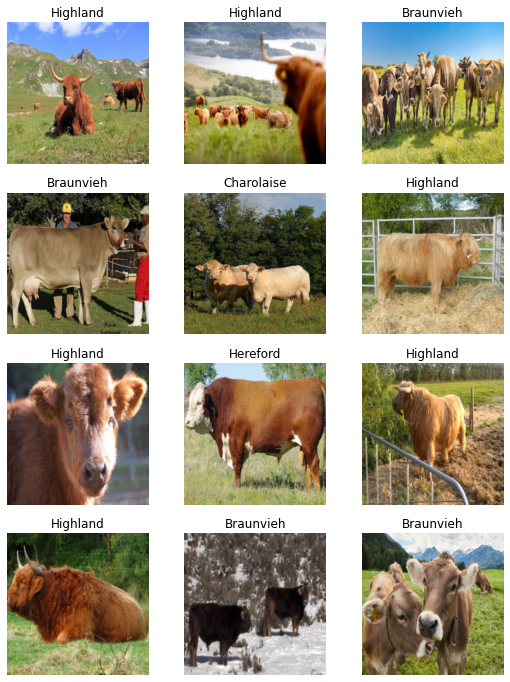

In [ ]:
dls.valid.show_batch(max_n=12, nrows=4)

In [ ]:
learn = vision_learner(dls, alexnet, metrics=accuracy)

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
learn.fit(15)

epoch,train_loss,valid_loss,accuracy,time
0,1.547347,0.881256,0.714976,28:48
1,1.211471,0.811036,0.743961,02:02
2,1.047230,0.729879,0.752013,02:00
3,0.931664,0.703719,0.766506,02:01
4,0.867791,0.682529,0.787440,02:02
5,0.830381,0.675361,0.789050,02:03
6,0.813705,0.676662,0.780998,02:03
7,0.786690,0.666374,0.771337,02:03
8,0.731753,0.666915,0.764895,02:13
9,0.693507,0.683389,0.768116,02:06


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

### 5. Zapis modelu

In [ ]:
learn.save('stage-1')

Path('models/stage-1.pth')

In [ ]:
learn.export(fname='model.pkl')

### 6. Interpretacja klasyfikacji

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


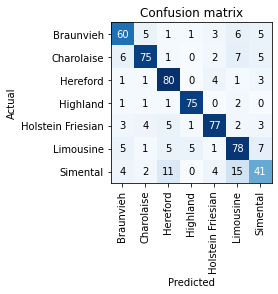

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
interp.most_confused(min_val = 4)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


[('Simental', 'Limousine', 15),
 ('Simental', 'Hereford', 11),
 ('Charolaise', 'Limousine', 7),
 ('Limousine', 'Simental', 7),
 ('Braunvieh', 'Limousine', 6),
 ('Charolaise', 'Braunvieh', 6),
 ('Braunvieh', 'Charolaise', 5),
 ('Braunvieh', 'Simental', 5),
 ('Charolaise', 'Simental', 5),
 ('Holstein Friesian', 'Hereford', 5),
 ('Limousine', 'Braunvieh', 5),
 ('Limousine', 'Hereford', 5),
 ('Limousine', 'Highland', 5),
 ('Hereford', 'Holstein Friesian', 4),
 ('Holstein Friesian', 'Charolaise', 4),
 ('Simental', 'Braunvieh', 4),
 ('Simental', 'Holstein Friesian', 4)]

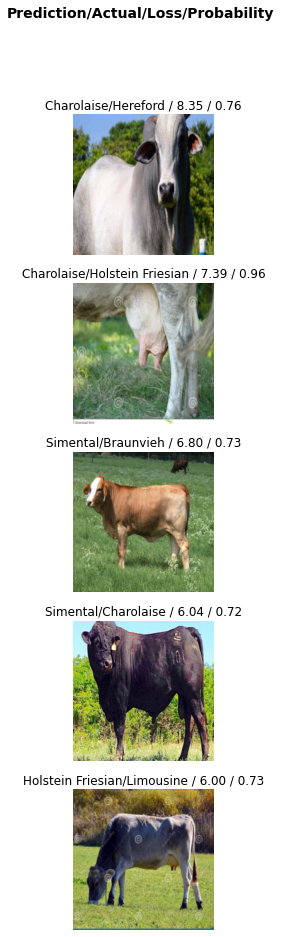

In [ ]:
interp.plot_top_losses(5, nrows=5)